# Measuring Solenoid Axis By Measuring $B_r$

## Background

- Want: Measure ANL MRI magnetic axis
- Idea: Using Hall probe rotating in XY plane (assuming z-axis geometric MRI axis) with some radius, and center offset from solenoid axis center, variations in $B_r$, which depend linearly on $r$, will have amplitude related to distance from Hall probe circle's center and magnet axis and phase that indicates angle.

## Theory

- Satisfy Maxwell's equations in a sourceless region with a field primarily in the z direction. Note we care about a region where the field is changing -- near each end of the solenoid will work great.

- Assuming no $\phi$ component to field and $\frac{\partial B_z}{\partial z}$ is constant,
$$0 =  \underline{\nabla} \cdot \underline{B} = \frac{1}{r} \frac{\partial (r B_r)}{\partial r} + \frac{\partial B_z}{\partial z}$$
so
$$ \frac{\partial (r B_r)}{\partial r} = - r \frac{\partial B_z}{\partial z} $$
thus
$$ B_r \approx - \frac{r}{2} \frac{\partial B_z}{\partial z} $$

## Imports

In [2]:
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt
%matplotlib inline

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d, histo

from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker

Welcome to JupyROOT 6.18/00


In [3]:
# nicer plot formatting
def config_plots():
    #must run twice for some reason (glitch in Jupyter)
    for i in range(2):
        plt.rcParams['figure.figsize'] = [10, 8]
        plt.rcParams['axes.grid'] = True
        plt.rcParams['axes.axisbelow'] = True
        plt.rcParams['grid.linestyle'] = '--'
        plt.rcParams.update({'font.size': 18})
        
config_plots()

In [4]:
plotdir = hpc_ext_path + "plots/solenoid_axis/"

## Calculator

In [5]:
datadir = mu2e_ext_path+"datafiles/FieldMapsCole/"
filename = "v2_bfield_map_cylin_r1m_p7.5mm_845568pts_08-24_204124_FIXED"

In [6]:
df_sol = DataFrameMaker(datadir+filename, input_type="pkl").data_frame

In [7]:
df_sol.R.unique()

array([0.9  , 0.875, 0.85 , 0.825, 0.8  , 0.775, 0.75 , 0.725, 0.7  ,
       0.675, 0.65 , 0.625, 0.6  , 0.575, 0.55 , 0.525, 0.5  , 0.475,
       0.45 , 0.425, 0.4  , 0.375, 0.35 , 0.325, 0.3  , 0.275, 0.25 ,
       0.225, 0.2  , 0.175, 0.15 , 0.125, 0.1  , 0.075, 0.05 , 0.025])

In [9]:
df_sol.Z.unique()

array([-4.575, -4.55 , -4.525, -4.5  , -4.475, -4.45 , -4.425, -4.4  ,
       -4.375, -4.35 , -4.325, -4.3  , -4.275, -4.25 , -4.225, -4.2  ,
       -4.175, -4.15 , -4.125, -4.1  , -4.075, -4.05 , -4.025, -4.   ,
       -3.975, -3.95 , -3.925, -3.9  , -3.875, -3.85 , -3.825, -3.8  ,
       -3.775, -3.75 , -3.725, -3.7  , -3.675, -3.65 , -3.625, -3.6  ,
       -3.575, -3.55 , -3.525, -3.5  , -3.475, -3.45 , -3.425, -3.4  ,
       -3.375, -3.35 , -3.325, -3.3  , -3.275, -3.25 , -3.225, -3.2  ,
       -3.175, -3.15 , -3.125, -3.1  , -3.075, -3.05 , -3.025, -3.   ,
       -2.975, -2.95 , -2.925, -2.9  , -2.875, -2.85 , -2.825, -2.8  ,
       -2.775, -2.75 , -2.725, -2.7  , -2.675, -2.65 , -2.625, -2.6  ,
       -2.575, -2.55 , -2.525, -2.5  , -2.475, -2.45 , -2.425, -2.4  ,
       -2.375, -2.35 , -2.325, -2.3  , -2.275, -2.25 , -2.225, -2.2  ,
       -2.175, -2.15 , -2.125, -2.1  , -2.075, -2.05 , -2.025, -2.   ,
       -1.975, -1.95 , -1.925, -1.9  , -1.875, -1.85 , -1.825, -1.8  ,
      

In [10]:
xy = df_sol.query("Z == -4.")

In [14]:
xy0 = xy[xy.Phi == 0.0]

In [ ]:
plt.plot(xy0.R, xy0.)

In [8]:
r0 = df_sol.query("R == 0.875 and Phi == 0.0000")
#r0 = df_sol.query("R == 0.025 and Phi == 0.0000")

In [36]:
r0

,R,Phi,Z,Br,Bphi,Bz,X,Y
459484,0.025,0.0,-4.575,-63.77567,0.06385,5085.605,0.025,0.0
459485,0.025,0.0,-4.550,-63.72102,0.21721,5213.180,0.025,0.0
459486,0.025,0.0,-4.525,-63.54776,0.36974,5340.528,0.025,0.0
459487,0.025,0.0,-4.500,-63.25750,0.52059,5467.410,0.025,0.0
459488,0.025,0.0,-4.475,-62.85291,0.66895,5593.596,0.025,0.0
459489,0.025,0.0,-4.450,-62.33765,0.81402,5718.861,0.025,0.0
459490,0.025,0.0,-4.425,-61.71632,0.95506,5842.986,0.025,0.0
459491,0.025,0.0,-4.400,-60.99436,1.09139,5965.764,0.025,0.0
459492,0.025,0.0,-4.375,-60.17794,1.22241,6087.001,0.025,0.0
459493,0.025,0.0,-4.350,-59.27382,1.34758,6206.514,0.025,0.0


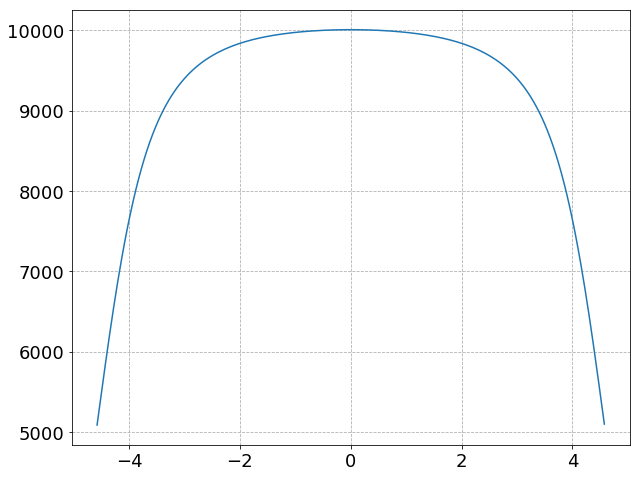

In [37]:
plt.plot(r0.Z, r0.Bz);

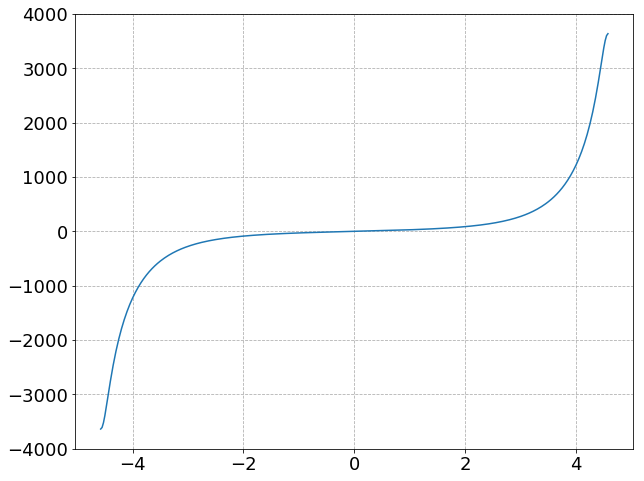

In [93]:
plt.plot(r0.Z, r0.Br);

In [38]:
r0 = r0.query("Z <= -4.4")
#r0 = r0.query("Z <= -4.0")

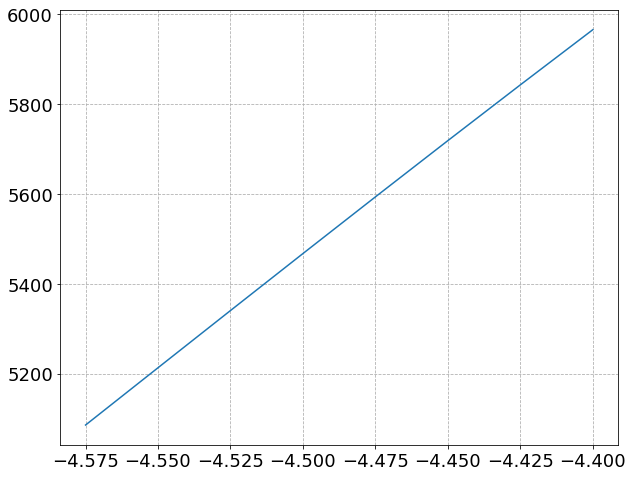

In [39]:
plt.plot(r0.Z, r0.Bz);

In [34]:
# in ascending z order
(r0.iloc[-1].Bz - r0.iloc[0].Bz) / (r0.iloc[-1].Z - r0.iloc[0].Z)

11986.074285714298

In [40]:
# in ascending z order
(r0.iloc[-1].Bz - r0.iloc[0].Bz) / (r0.iloc[-1].Z - r0.iloc[0].Z)

5029.480000000009

- So a reasonable value of $\frac{\partial B_z}{\partial z}$ for a tightly wound solenoid with max field ~1 T and length ~9 m is **0.44 T / m**.
- Note that the linear region is in the last ~0.5 m of either end of the solenoid.

In [45]:
np.diff(df_sol.Z.unique())[0]

0.025000000000000355

In [41]:
## CALCULATE dBz/dz point by point ##

In [54]:
dBzdz = r0.Bz.diff() / 0.025

In [53]:
#dBzdz

In [ ]:
plt.plot(r0.Z, dBzdz);

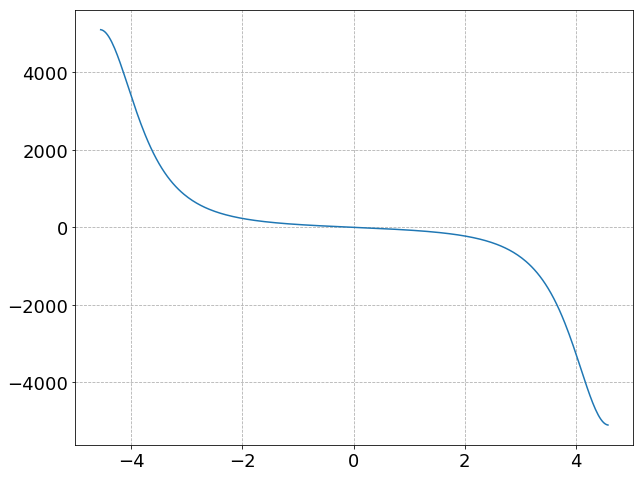

In [51]:
plt.plot(r0.Z, dBzdz);

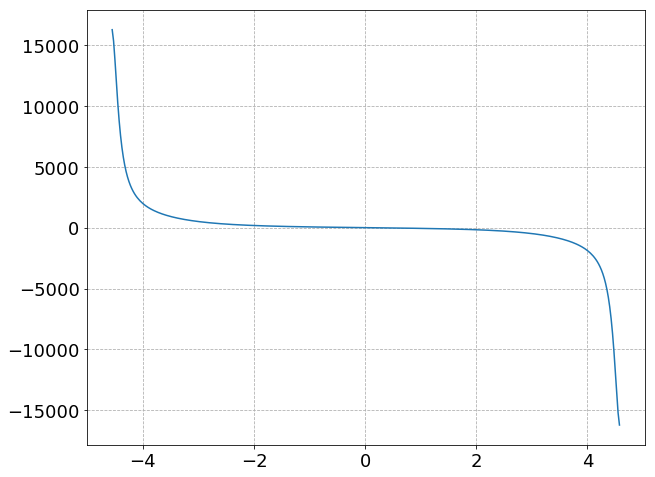

In [55]:
plt.plot(r0.Z, dBzdz);

In [15]:
def calc_Br(thetas, R, r0, theta0, dBzdz):
    r0y = r0*np.cos(theta0)
    r0x = r0*np.sin(theta0)
    rys = R*np.cos(thetas)
    rxs = R*np.sin(thetas)
    delta_rs2 = ((rxs-r0x)**2+(rys-r0y)**2)
    delta_rs = np.sqrt(delta_rs2)
    # testing
    #phis = np.arccos((r0**2-delta_rs2-R**2)/(-2*delta_rs*R))
    cosphis = ((r0**2-delta_rs2-R**2)/(-2*delta_rs*R))
    Brs_true = - np.sqrt(delta_rs2) * dBzdz / 2
    Brs = Brs_true *cosphis#* np.cos(phis)
    return Brs, cosphis

In [21]:
thetas = np.linspace(0, 2*np.pi, 100)

In [22]:
Brs,cosphis = calc_Br(thetas, R=0.25, r0=0.01, theta0=np.pi/2, dBzdz=0.5)

In [23]:
Brs

array([-0.0625    , -0.06234144, -0.06218352, -0.06202687, -0.06187213,
       -0.06171992, -0.06157084, -0.06142551, -0.06128451, -0.0611484 ,
       -0.06101773, -0.06089303, -0.0607748 , -0.06066352, -0.06055963,
       -0.06046356, -0.06037569, -0.06029637, -0.06022592, -0.06016463,
       -0.06011274, -0.06007047, -0.06003798, -0.0600154 , -0.06000283,
       -0.06000031, -0.06000786, -0.06002545, -0.06005299, -0.06009039,
       -0.0601375 , -0.06019411, -0.06026002, -0.06033494, -0.06041858,
       -0.0605106 , -0.06061063, -0.06071826, -0.06083308, -0.0609546 ,
       -0.06108235, -0.06121581, -0.06135443, -0.06149767, -0.06164495,
       -0.06179567, -0.06194922, -0.062105  , -0.06226236, -0.06242068,
       -0.06257932, -0.06273764, -0.062895  , -0.06305078, -0.06320433,
       -0.06335505, -0.06350233, -0.06364557, -0.06378419, -0.06391765,
       -0.0640454 , -0.06416692, -0.06428174, -0.06438937, -0.0644894 ,
       -0.06458142, -0.06466506, -0.06473998, -0.06480589, -0.06

In [24]:
cosphis

array([0.99920096, 0.99920012, 0.99920573, 0.99921776, 0.99923605,
       0.99926034, 0.9992903 , 0.99932544, 0.99936524, 0.99940905,
       0.99945617, 0.9995058 , 0.99955713, 0.99960929, 0.99966139,
       0.99971251, 0.99976179, 0.99980834, 0.99985135, 0.99989006,
       0.99992377, 0.99995187, 0.99997386, 0.99998934, 0.99999803,
       0.99999978, 0.99999455, 0.99998243, 0.99996365, 0.99993855,
       0.99990758, 0.99987129, 0.99983034, 0.99978546, 0.99973744,
       0.99968713, 0.9996354 , 0.99958317, 0.99953131, 0.99948072,
       0.99943224, 0.99938669, 0.9993448 , 0.99930725, 0.99927464,
       0.99924746, 0.99922613, 0.99921095, 0.99920212, 0.99919973,
       0.99920378, 0.99921415, 0.99923063, 0.99925291, 0.9992806 ,
       0.99931323, 0.99935026, 0.99939108, 0.99943505, 0.99948146,
       0.9995296 , 0.99957872, 0.99962807, 0.99967692, 0.99972453,
       0.99977018, 0.99981322, 0.999853  , 0.99988895, 0.99992055,
       0.99994734, 0.99996893, 0.99998501, 0.99999535, 0.99999

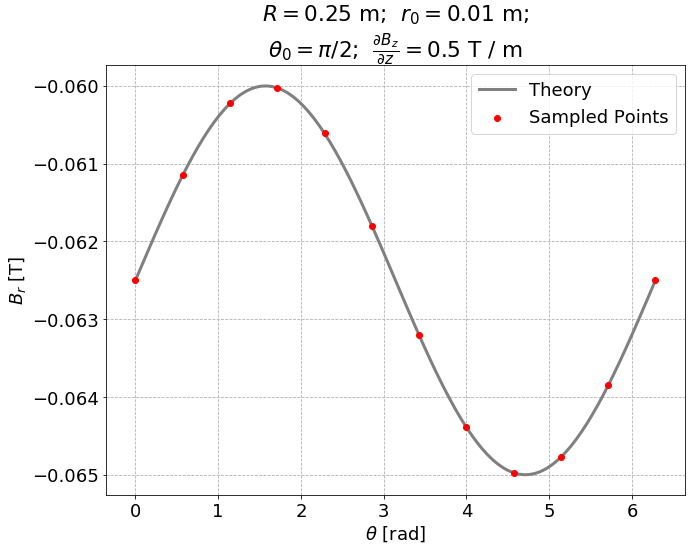

In [53]:
plt.plot(thetas, Brs, linewidth=3, c="gray", label="Theory");
plt.scatter(thetas[::9], Brs[::9], c="red", zorder=100, label="Sampled Points");
plt.xlabel(r"$\theta$ [rad]");
plt.ylabel(r"$B_r$ [T]");
plt.title(r"$R=0.25$ m;  $r_0=0.01$ m;"+"\n"+r"$\theta_0=\pi/2$;  " \
            r"$\frac{\partial B_z}{\partial z}=0.5$ T / m")
plt.legend();

plt.tight_layout()

plt.savefig(plotdir+"example_curve.png")

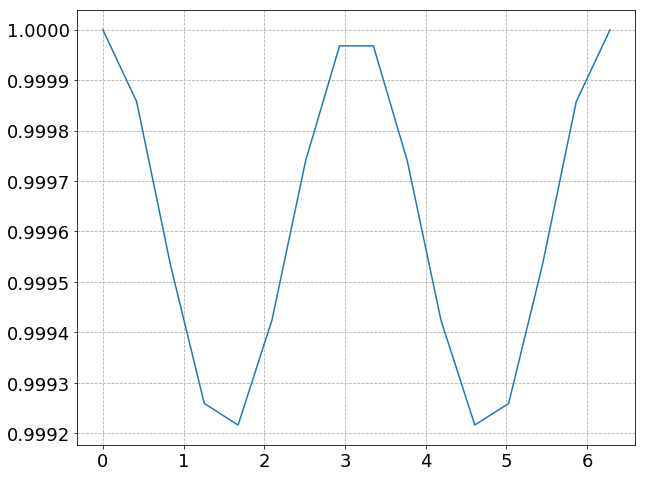

In [83]:
plt.plot(thetas, cosphis);

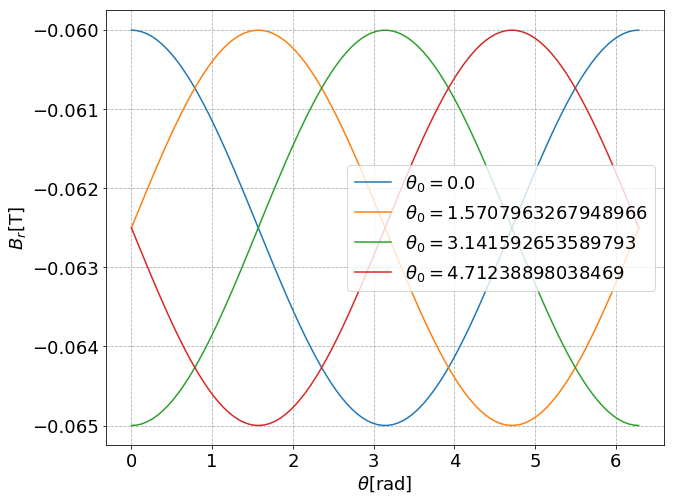

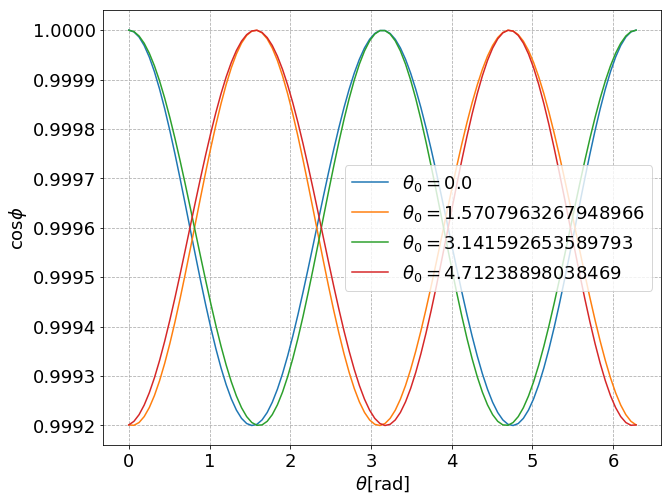

In [84]:
thetas = np.linspace(0, 2*np.pi, 100)
Brss = []
phiss = []

for t0 in np.linspace(0, 2*np.pi, 5)[:-1]:
    Brs_, Phis_ = calc_Br(thetas, R=0.25, r0=0.01, theta0=t0, dBzdz=0.5) 
    Brss.append(Brs_)
    phiss.append(Phis_)
    plt.plot(thetas, Brss[-1], label=r"$\theta_0 = $"+f"{t0}")

plt.xlabel(r"$\theta$"+"[rad]")
plt.ylabel(r"$B_r$"+"[T]")
plt.legend();

fig = plt.figure()
for i,t0 in enumerate(np.linspace(0, 2*np.pi, 5)[:-1]):
    plt.plot(thetas, phiss[i], label=r"$\theta_0 = $"+f"{t0}")
    
plt.xlabel(r"$\theta$"+"[rad]")
plt.ylabel(r"$\cos\phi$")
plt.legend();


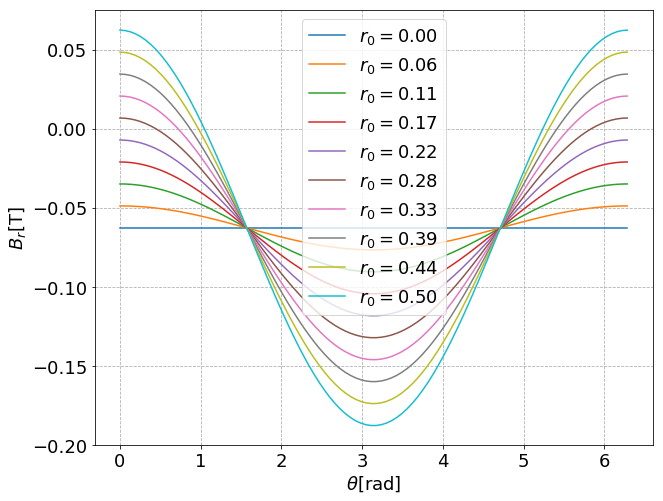

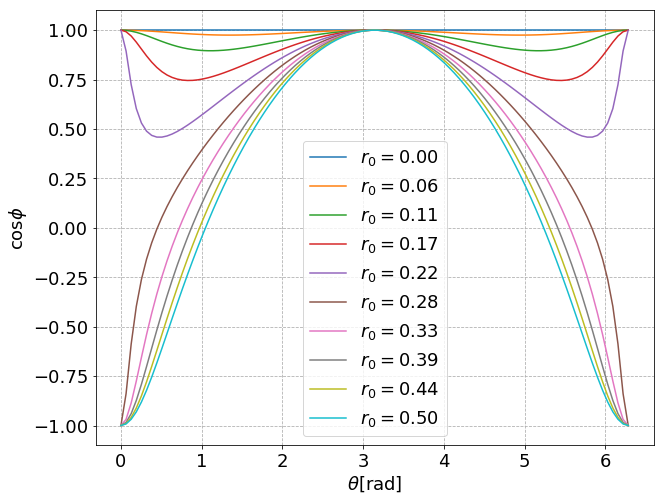

In [92]:
thetas = np.linspace(0, 2*np.pi, 100)
Brss = []
phiss = []

rs = np.linspace(0,0.5,10)

for r in rs:
    Brs_, Phis_ = calc_Br(thetas, R=0.25, r0=r, theta0=0., dBzdz=0.5) 
    Brss.append(Brs_)
    phiss.append(Phis_)
    plt.plot(thetas, Brss[-1], label=r"$r_0 = $"+f"{r:.2f}")

plt.xlabel(r"$\theta$"+"[rad]")
plt.ylabel(r"$B_r$"+"[T]")
plt.legend();

fig = plt.figure()
for i,r in enumerate(rs):
#for i,t0 in enumerate(np.linspace(0, 2*np.pi, 5)[:-1]):
    plt.plot(thetas, phiss[i], label=r"$r_0 = $"+f"{r:.2f}")
    
plt.xlabel(r"$\theta$"+"[rad]")
plt.ylabel(r"$\cos\phi$")
plt.legend();

- Should now be able to take some input data points, given the coordinate system of your measuring device, and fit some $r_0$ and $\theta_0$.